# Instrucciones

1. **Seleccionar Dataset de OpenML:**
   - **ID:** `31`
   - **URL:** Para acceder al dataset, visita [OpenML Dataset ID: 31](https://www.openml.org/d/31)
   - **Nombre del Dataset:** German Credit dataset
   - **Descripción:** Este conjunto de datos clasifica a las personas, descritas por un conjunto de atributos, como riesgos de crédito buenos o malos. Además, viene con una matriz de costos. La matriz indica que es peor clasificar a un cliente como bueno cuando es malo (con un costo de 5) que clasificar a un cliente como malo cuando es bueno (con un costo de 1).

2. **Cargar el Dataset:**
   - Utiliza la función auxiliar de Scikit-learn para cargar el dataset. El código necesario es el siguiente:


In [14]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [15]:
from sklearn.datasets import fetch_openml
import pandas as pd

dataset = fetch_openml(data_id=31, as_frame=True)
data = dataset.frame


4. **Proceso de Preparación de Datos:**
 - 4.1. **Limpieza de Datos:**
      - 4.1.1. **Verificar Valores Nulos:** Revisa el dataset para identificar y manejar cualquier valor nulo o faltante.


In [16]:
# Verificar si hay valores nulos en el dataset
print(data.isnull().sum())


checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64


In [ ]:
# Eliminar filas con valores nulos (si es necesario)
data = data.dropna()

# O imputar valores nulos (con la media, mediana, moda, etc.)
# data = data.fillna(data.mean())  # Ejemplo con la media


- 4.1.2. **Manejar Valores Nulos:**
   - Dependiendo de la cantidad y naturaleza de los valores nulos, puedes decidir eliminarlos o imputarlos.


In [19]:
# Eliminar filas con valores nulos (si es necesario)
data = data.dropna()

# O imputar valores nulos (con la media, mediana, moda, etc.)
# data = data.fillna(data.mean())  # Ejemplo con la media

- 4.2. **Formato de Datos:**
   - Revisa el tipo de datos de cada variable y realiza conversiones si es necesario.

In [20]:
# Verificar tipos de datos
print(data.dtypes)

# Convertir tipos de datos si es necesario (ejemplo: convertir a categorías)
# data['column_name'] = data['column_name'].astype('category')

checking_status           category
duration                   float64
credit_history            category
purpose                   category
credit_amount              float64
savings_status            category
employment                category
installment_commitment     float64
personal_status           category
other_parties             category
residence_since            float64
property_magnitude        category
age                        float64
other_payment_plans       category
housing                   category
existing_credits           float64
job                       category
num_dependents             float64
own_telephone             category
foreign_worker            category
class                     category
dtype: object


- 4.3. **Identificación de Outliers:**
   - Puedes usar diagramas de caja (boxplots) para identificar outliers visualmente.


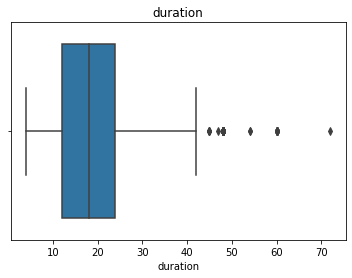

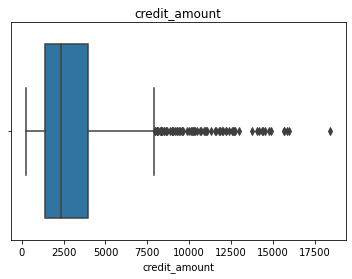

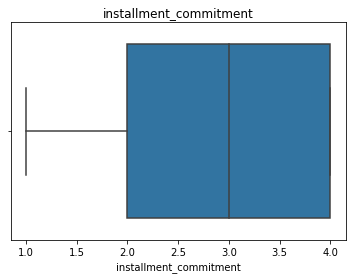

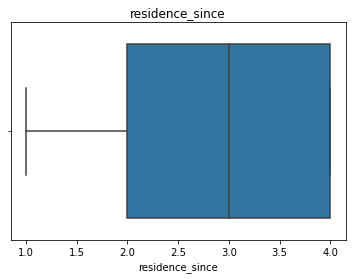

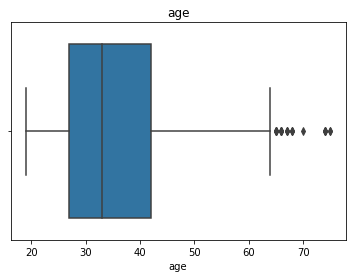

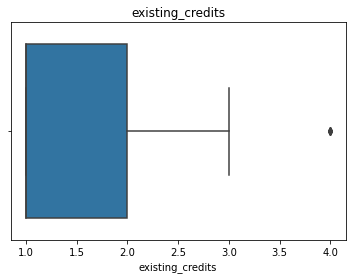

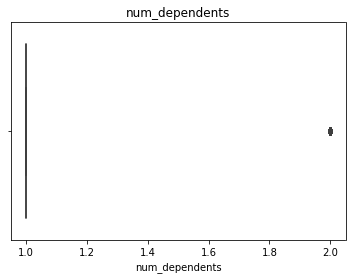

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot de todas las variables numéricas
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    sns.boxplot(x=data[col])
    plt.title(col)
    plt.show()


- 4.4. **Manejo de Outliers:**
   - Puedes decidir eliminarlos o transformarlos.


In [23]:
# Ejemplo de eliminación de outliers usando el rango intercuartil (IQR)
for col in numerical_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    data = data[~((data[col] < (Q1 - 1.5 * IQR)) | (data[col] > (Q3 + 1.5 * IQR)))]


- 4.5. **Construcción de Características:**
   - Planifica y crea nuevas características que puedan ser útiles para el modelo.


In [ ]:
# Ejemplo de creación de una nueva característica
# data['new_feature'] = data['feature1'] * data['feature2']


- 4.6. **Visualización de Datos:**
   - Utiliza gráficos para entender la distribución y relación entre las variables.

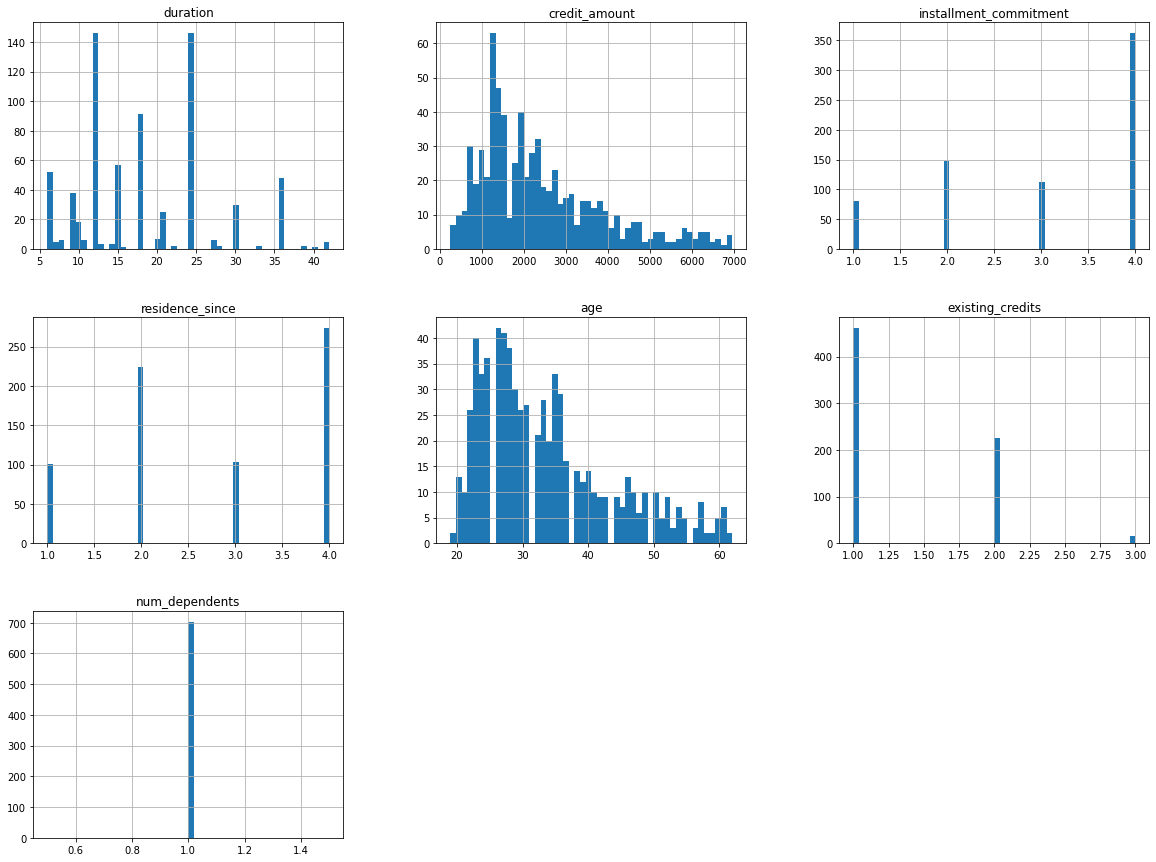

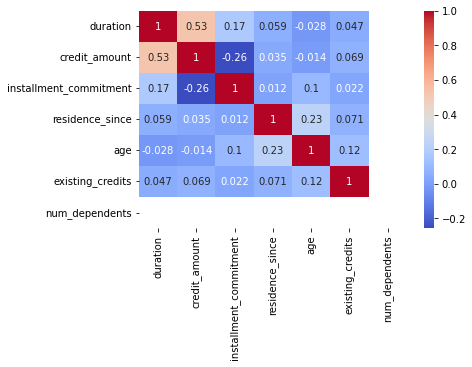

In [24]:
# Histogramas
data[numerical_cols].hist(bins=50, figsize=(20,15))
plt.show()

# Matriz de correlación
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


5. **Construir un Dataset Inicial:**
   - Con los datos listos para utilizar, construye un dataset inicial. Para ello, puedes guardar el dataset en un archivo CSV exportado y comprobar si existe en dicho entorno.
      - Si ya existe el archivo, el código que limpia y prepara los datos no se ejecuta, sino que lo importa directamente.
      - Si no existe, el código limpia y prepara los datos y luego exporta el dataset a un archivo CSV.


In [26]:
import os
import pandas as pd
from sklearn.datasets import fetch_openml

# Define el nombre del archivo CSV
csv_filename = 'dataset.csv'

# Verifica si el archivo CSV ya existe
if os.path.exists(csv_filename):
    # Si el archivo existe, lo importa directamente
    print(f"Loading data from {csv_filename}")
    dataset = pd.read_csv(csv_filename)
else:
    # Si el archivo no existe, carga el dataset desde OpenML
    print("Fetching data from OpenML...")
    openml_dataset = fetch_openml(data_id=31, as_frame=True)
    data = openml_dataset.frame
    
    # Realiza la limpieza y preparación de datos necesaria aquí
    # ...
    # Ejemplo: Eliminar filas con valores nulos (puedes realizar operaciones más complejas según necesites)
    cleaned_data = data.dropna()
    
    # Exporta el dataset limpio y preparado a un archivo CSV
    print(f"Saving cleaned data to {csv_filename}")
    cleaned_data.to_csv(csv_filename, index=False)
    dataset = cleaned_data  # Asegúrate de asignar el DataFrame limpio a 'dataset'

# Ahora, 'dataset' contiene tus datos listos para usar
print(dataset.head())  # Imprime las primeras filas del dataset para verificar

Loading data from dataset.csv
  checking_status  duration                  credit_history  \
0              <0       6.0  critical/other existing credit   
1        0<=X<200      48.0                   existing paid   
2     no checking      12.0  critical/other existing credit   
3              <0      42.0                   existing paid   
4              <0      24.0              delayed previously   

               purpose  credit_amount    savings_status employment  \
0             radio/tv         1169.0  no known savings        >=7   
1             radio/tv         5951.0              <100     1<=X<4   
2            education         2096.0              <100     4<=X<7   
3  furniture/equipment         7882.0              <100     4<=X<7   
4              new car         4870.0              <100     1<=X<4   

   installment_commitment     personal_status other_parties  ...  \
0                     4.0         male single          none  ...   
1                     2.0  female 

6. **Plantear Hipótesis del Modelo:**
   - Plantea al menos 3-4 hipótesis para el modelo a entrenar. Considera los siguientes aspectos:
      - Conjunto de características a utilizar (y cuáles no).
      - Relaciones entre las características seleccionadas.
      - Variable objetivo.
      - Tipo de modelo a utilizar.

- 6.1. **Conjunto de Características a Utilizar:**
   - **Hipótesis 1.1:** Las características categóricas como `checking_status`, `credit_history`, `purpose`, etc., podrían tener un impacto significativo en la variable objetivo `class` ya que estas categorías podrían estar asociadas con el riesgo crediticio de un individuo.
   - **Hipótesis 1.2:** Las características numéricas como `duration`, `credit_amount`, `age`, etc., podrían influir en la capacidad de un individuo para pagar un crédito. Por ejemplo, los préstamos más grandes y los plaz


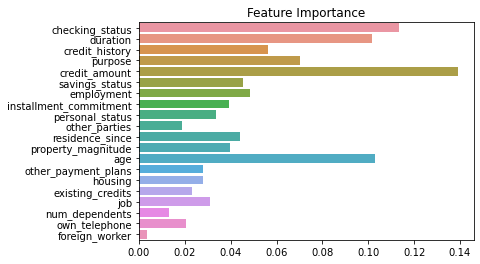

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Cargar tus datos
# Asegúrate de tener el archivo CSV en la ruta correcta o proporciona la ruta completa al archivo
df = pd.read_csv('dataset.csv')

# Si tus datos tienen características categóricas, puedes convertirlas a tipo 'category'
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype('category')

# Codificar características categóricas
le = LabelEncoder()
df_encoded = df.apply(lambda col: le.fit_transform(col) if col.dtype == 'category' else col)

# Separar características y variable objetivo
X = df_encoded.drop(columns=['class'])
y = df_encoded['class']

# Entrenar un clasificador de bosque aleatorio
clf = RandomForestClassifier()
clf.fit(X, y)

# Visualizar importancia de características
feature_importance = clf.feature_importances_
sns.barplot(x=feature_importance, y=X.columns)
plt.title('Feature Importance')
plt.show()


- 6.2. **Relaciones Entre Características:**
   - **Hipótesis 2.1:** Podría haber una relación entre `employment` y `credit_amount` ya que los individuos empleados podrían tener acceso a mayores cantidades de crédito.
   - **Hipótesis 2.2:** La `duration` del crédito podría estar inversamente relacionada con la `age` del solicitante, con los solicitantes más jóvenes optando por plazos más largos.


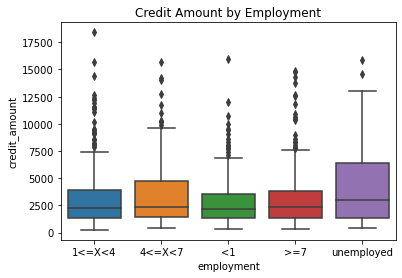

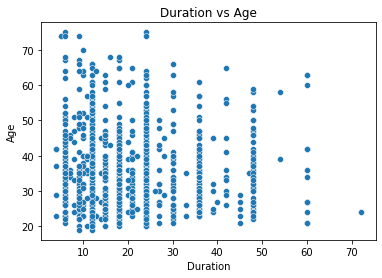

In [31]:
# Visualizar la relación entre 'employment' y 'credit_amount'
sns.boxplot(x='employment', y='credit_amount', data=df)
plt.title('Credit Amount by Employment')
plt.show()

# Visualizar la relación entre 'duration' y 'age'
sns.scatterplot(x='duration', y='age', data=df)
plt.title('Duration vs Age')
plt.xlabel('Duration')
plt.ylabel('Age')
plt.show()

- 6.3. **Variable Objetivo:**
   - **Hipótesis 3:** La variable objetivo `class` podría estar fuertemente influenciada por características como `checking_status`, `credit_history`, y `credit_amount` ya que estas son indicativas de la situación financiera del solicitante.

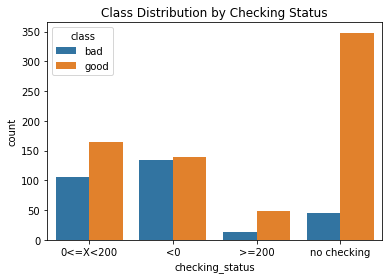

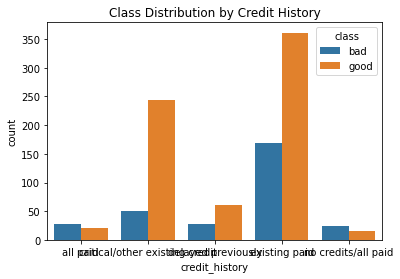

In [32]:
# Visualizar la distribución de 'class' con respecto a 'checking_status'
sns.countplot(x='checking_status', hue='class', data=df)
plt.title('Class Distribution by Checking Status')
plt.show()

# Visualizar la distribución de 'class' con respecto a 'credit_history'
sns.countplot(x='credit_history', hue='class', data=df)
plt.title('Class Distribution by Credit History')
plt.show()

- 6.4. **Tipo de Modelo:**
   - **Hipótesis 4.1:** Un modelo de clasificación como Regresión Logística podría ser un buen punto de partida ya que la variable objetivo es categórica.
   - **Hipótesis 4.2:** Modelos basados en árboles como Random Forest o Gradient Boosting podrían ser efectivos para capturar relaciones no lineales y interacciones entre características.
   - **Hipótesis 4.3:** Podrías necesitar codificar las características categóricas (por ejemplo, mediante codificación one-hot o codificación de etiquetas) para utilizarlas en modelos que no manejan variables categóricas directamente.


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar un modelo de Regresión Logística con más iteraciones y un solucionador diferente
log_reg = LogisticRegression(max_iter=1000, solver='saga')
log_reg.fit(X_train_scaled, y_train)

# Hacer predicciones
y_pred = log_reg.predict(X_test_scaled)

# Evaluar el modelo
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.34      0.43        59
           1       0.76      0.89      0.82       141

    accuracy                           0.73       200
   macro avg       0.67      0.62      0.62       200
weighted avg       0.71      0.73      0.71       200



7. **Para cada una de las hipótesis, entrenamos un modelo simple y contrastamos la hipótesis evaluándolo.**
- - Para dicho entrenamiento, usamos un porcentaje de los ejemplos disponibles y sólo un dataset de entrenamiento y test (sin validación), ya que lo que buscamos es obtener una idea rápida sobre la idoneidad de las mismas.

- 7.1. **Preparar los Datos:**
   - Primero, divide tus datos en conjuntos de entrenamiento y prueba. También, si tienes características categóricas, asegúrate de codificarlas adecuadamente.

- 7.2. **Entrenar Modelos Simples:**
   - Para cada hipótesis, selecciona un conjunto de características y entrena un modelo simple. Puedes usar modelos lineales, árboles de decisión, o cualquier otro modelo que sea rápido de entrenar.

- 7.3. **Evaluar los Modelos:**
   - Evalúa cada modelo usando métricas de clasificación como precisión, recall, F1-score, etc. Esto te dará una idea rápida de qué tan bien está


In [37]:
from sklearn.metrics import f1_score

# Almacena los resultados de cada hipótesis
results = {}

def train_and_evaluate(features, X, y, hypothesis_name):
    X_h = X[features]
    
    # Dividir datos
    X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(X_h, y, test_size=0.2, random_state=42)
    
    # Escalar los datos
    scaler_h = StandardScaler()
    X_train_scaled_h = scaler_h.fit_transform(X_train_h)
    X_test_scaled_h = scaler_h.transform(X_test_h)
    
    # Entrenar un modelo de Regresión Logística
    log_reg_h = LogisticRegression()
    log_reg_h.fit(X_train_scaled_h, y_train_h)
    
    # Hacer predicciones y evaluar
    y_pred_h = log_reg_h.predict(X_test_scaled_h)
    print(f"Reporte de Clasificación para conjunto de características {features}:")
    print(classification_report(y_test_h, y_pred_h))
    print("--------------------------------------------------------------")
    
    # Almacenar el F1-score en el diccionario de resultados
    f1 = f1_score(y_test_h, y_pred_h, average='weighted')
    results[hypothesis_name] = f1

# Evaluar cada conjunto de características
train_and_evaluate(features_h1, X, y, 'Hypothesis 1')
train_and_evaluate(features_h2, X, y, 'Hypothesis 2')
train_and_evaluate(features_h3, X, y, 'Hypothesis 3')

# Función para concluir basado en los F1-scores
def conclude(results):
    best_hypothesis = max(results, key=results.get)
    print(f"La mejor hipótesis basada en el F1-score ponderado es: {best_hypothesis} con un F1-score de {results[best_hypothesis]:.2f}")
    print("Conclusiones:")
    for hypothesis, f1 in results.items():
        print(f"- {hypothesis}: El F1-score ponderado obtenido fue {f1:.2f}.")
    print(f"Se recomienda proceder con las características seleccionadas en {best_hypothesis} para futuros modelos y análisis.")

# Llamar a la función de conclusión
conclude(results)

Reporte de Clasificación para conjunto de características ['checking_status', 'credit_history', 'purpose']:
              precision    recall  f1-score   support

           0       0.43      0.20      0.28        59
           1       0.73      0.89      0.80       141

    accuracy                           0.69       200
   macro avg       0.58      0.54      0.54       200
weighted avg       0.64      0.69      0.64       200

--------------------------------------------------------------
Reporte de Clasificación para conjunto de características ['duration', 'credit_amount', 'age']:
              precision    recall  f1-score   support

           0       0.80      0.14      0.23        59
           1       0.73      0.99      0.84       141

    accuracy                           0.73       200
   macro avg       0.77      0.56      0.54       200
weighted avg       0.75      0.73      0.66       200

--------------------------------------------------------------
Reporte de Clasi

8. **Entrenamiento en Profundidad del Modelo Seleccionado:**
   - Tras evaluar las hipótesis, selecciona un tipo de modelo y comienza a entrenarlo en profundidad, siguiendo las explicaciones vistas en el curso:
      - Escoger un conjunto de características.
      - Preprocesar los datos, crear procesos y subsets de validación, y preparar el conjunto de test final.
      - Realizar la comprobación de hiperparámetros.
      - Evaluar el modelo utilizando métricas detalladas.


- 8.1. **Escoger un Conjunto de Características:**
   - Basado en la Hipótesis 2: `selected_features = ['duration', 'credit_amount', 'age']`.


- 8.2. **Preprocesar los Datos:**
   - Realiza los pasos necesarios para preprocesar los datos seleccionados.

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

selected_features = ['duration', 'credit_amount', 'age']

# Dividir datos en entrenamiento y prueba
X_train_full, X_test, y_train_full, y_test = train_test_split(X[selected_features], y, test_size=0.2, random_state=42)

# Dividir datos de entrenamiento en entrenamiento y validación
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

- 8.3. **Comprobación de Hiperparámetros:**

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Definir el modelo
model = LogisticRegression()

# Definir los hiperparámetros a ajustar
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear']
}

# Configurar la búsqueda en grilla
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='f1_weighted')

# Ajustar el modelo
grid_search.fit(X_train_scaled, y_train)

# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_

- 8.4. **Entrenamiento y Evaluación del Modelo:**

In [41]:
# Entrenar el modelo con los mejores hiperparámetros
final_model = LogisticRegression(**best_params)
final_model.fit(X_train_scaled, y_train)

# Hacer predicciones
y_pred_valid = final_model.predict(X_valid_scaled)
y_pred_test = final_model.predict(X_test_scaled)

# Evaluar el modelo
print("Reporte de Clasificación para el conjunto de validación:")
print(classification_report(y_valid, y_pred_valid))
print("Reporte de Clasificación para el conjunto de prueba:")
print(classification_report(y_test, y_pred_test))

Reporte de Clasificación para el conjunto de validación:
              precision    recall  f1-score   support

           0       0.62      0.16      0.26        62
           1       0.72      0.96      0.82       138

    accuracy                           0.71       200
   macro avg       0.67      0.56      0.54       200
weighted avg       0.69      0.71      0.65       200

Reporte de Clasificación para el conjunto de prueba:
              precision    recall  f1-score   support

           0       0.41      0.12      0.18        59
           1       0.72      0.93      0.81       141

    accuracy                           0.69       200
   macro avg       0.56      0.52      0.50       200
weighted avg       0.63      0.69      0.62       200



- 8.5. **Análisis:**
- - 8.5.1. **Precision:**
   - Para la clase 0 (malos créditos), la precisión es relativamente baja tanto en el conjunto de validación como en el de prueba. Esto significa que el modelo tiene un número significativo de falsos positivos para la clase 0.
   - Para la clase 1 (buenos créditos), la precisión es más alta, indicando que el modelo es más confiable al predecir buenos créditos.

- - 8.5.2. **Recall:**
   - El recall para la clase 0 es bajo, lo que significa que el modelo no está identificando correctamente muchos de los malos créditos reales.
   - El recall para la clase 1 es alto, lo que indica que el modelo identifica correctamente la mayoría de los buenos créditos.

- - 8.5.3. **F1-Score:**
   - El F1-score para la clase 0 es bajo, lo cual es una consecuencia de la baja precisión y recall para esta clase.
   - El F1-score para la clase 1 es bastante más alto, reflejando un buen balance entre precisión y recall para los buenos créditos.

- 8.6. **Conclusión:**
   - El modelo actual tiene un rendimiento moderado, con un área de mejora significativa en la identificación de malos créditos. Se recomienda explorar las estrategias mencionadas para mejorar el rendimiento del modelo antes de desplegarlo en un entorno de producción.

9. **Iteración y Experimentación Continua:**
   - En el proceso de entrenamiento final, busca iterar, iterar e iterar. Plantea múltiples posibilidades o hipótesis, compruébalas y anota sus resultados.
   - La experimentación continua te permitirá ajustar y mejorar tu modelo a medida que obtengas más información sobre su rendimiento.
- 9.1. **Selección de Hipótesis y Características:**
   - Continúa seleccionando las hipótesis y conjuntos de características que deseas probar. Puedes hacerlo siguiendo el enfoque que mencionaste anteriormente. Por ejemplo, puedes definir las características de cada hipótesis y guardarlas en una lista:


In [43]:
# Hipótesis y características
hipotesis = [
    {'name': 'Hipótesis 1', 'features': ['checking_status', 'credit_history', 'purpose']},
    {'name': 'Hipótesis 2', 'features': ['duration', 'credit_amount', 'age']},
    {'name': 'Hipótesis 3', 'features': ['checking_status', 'credit_history', 'credit_amount']}
]

- 9.2. **Ciclo de Iteración:**
   - Itera a través de las hipótesis y características, entrenando y evaluando el modelo para cada combinación. Puedes usar un bucle for para esto:
   

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

results = []

for hipotesis_config in hipotesis:
    features = hipotesis_config['features']
    
    # Preparar el conjunto de datos con las características seleccionadas
    
    # Dividir datos en conjunto de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X[features], y, test_size=0.2, random_state=42)
    
    # Entrenar un modelo (por ejemplo, Regresión Logística)
    model = LogisticRegression()
    model.fit(X_train, y_train)
    
    # Evaluar el modelo
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Guardar resultados
    result = {
        'hipotesis': hipotesis_config['name'],
        'features': features,
        'report': report
    }
    results.append(result)

In [ ]:
- 9.3. **Análisis de Resultados:**
   - Después de completar el ciclo de iteración, tendrás resultados para cada hipótesis. Puedes analizar estos resultados y comparar el rendimiento de diferentes hipótesis. Por ejemplo, puedes encontrar la hipótesis con el F1-score ponderado más alto:
  

In [45]:
best_hypothesis = None
best_f1_score = 0

for result in results:
    weighted_f1 = result['report']['weighted avg']['f1-score']
    if weighted_f1 > best_f1_score:
        best_f1_score = weighted_f1
        best_hypothesis = result

print("La mejor hipótesis basada en el F1-score ponderado es:", best_hypothesis['hipotesis'])
print("F1-score ponderado:", best_f1_score)

# Imprimir otros detalles del reporte, como precision, recall, etc.
print("Reporte de la mejor hipótesis:")
print(best_hypothesis['report'])

La mejor hipótesis basada en el F1-score ponderado es: Hipótesis 2
F1-score ponderado: 0.6510666194188519
Reporte de la mejor hipótesis:
{'0': {'precision': 0.7777777777777778, 'recall': 0.11864406779661017, 'f1-score': 0.2058823529411765, 'support': 59}, '1': {'precision': 0.7277486910994765, 'recall': 0.9858156028368794, 'f1-score': 0.8373493975903614, 'support': 141}, 'accuracy': 0.73, 'macro avg': {'precision': 0.7527632344386271, 'recall': 0.5522298353167447, 'f1-score': 0.5216158752657689, 'support': 200}, 'weighted avg': {'precision': 0.7425072716695753, 'recall': 0.73, 'f1-score': 0.6510666194188519, 'support': 200}}


- 9.4. **Conclusión:**
   - Después de completar el ciclo de iteración, tendrás resultados para cada hipótesis. Puedes analizar estos resultados y comparar el rendimiento de diferentes hipótesis. Por ejemplo, puedes encontrar la hipótesis con el F1-score ponderado más alto:
   
   De los resultados proporcionados, podemos sacar las siguientes conclusiones:

   1. La mejor hipótesis basada en el F1-score ponderado es la "Hipótesis 2" con un F1-score ponderado de aproximadamente 0.6511.

   2. Al observar el reporte de la mejor hipótesis, podemos notar lo siguiente:

      - Para la clase "0" (posiblemente "mal crédito"), el modelo tiene una precisión baja del 0.7778, lo que significa que de las predicciones que hizo para esta clase, solo el 77.78% eran correctas. Sin embargo, el recall (sensibilidad) es aún más bajo, lo que indica que el modelo no pudo identificar correctamente la mayoría de las instancias de esta clase.

      - Para la clase "1" (posiblemente "buen crédito"), el modelo tiene una precisión del 0.7277, lo que significa que el 72.77% de las predicciones para esta clase son correctas. Además, el recall es alto, lo que sugiere que el modelo puede identificar correctamente la mayoría de las instancias de esta clase.

   3. Aunque la precisión del modelo para la clase "0" es baja, el F1-score ponderado tiene en cuenta tanto la precisión como el recall, lo que indica que la "Hipótesis 2" es la mejor opción en términos de equilibrio entre precisión y recall.

   En resumen, la "Hipótesis 2" con las características 'duration', 'credit_amount' y 'age' parece ser la mejor elección para desarrollar un modelo basado en los resultados proporcionados. Sin embargo, aún se pueden realizar ajustes adicionales y explorar otras características o modelos para mejorar el rendimiento del modelo.


10. **Evaluación Detallada en Cada Iteración:**
   - En cada iteración, evaluamos el modelo con detenimiento y realizamos un análisis exhaustivo de varios aspectos, que incluyen:
      - **Conjunto de Métricas de Evaluación:** Calculamos métricas de evaluación como precisión, recall, F1-score, AUC-ROC, entre otras, para comprender el rendimiento general del modelo.
      - **Representación de Errores o Residuos:** Analizamos la representación de errores o residuos para entender dónde y cómo el modelo comete errores y si hay patrones en los mismos.
      - **Validación:** Utilizamos conjuntos de validación para asegurarnos de que el modelo no está sobreajustando los datos de entrenamiento y generaliza bien a datos no vistos.
      - **Hiperparámetros:** Ajustamos y optimizamos los hiperparámetros del modelo para encontrar la mejor configuración.
      - **Desviación vs Sobreajuste:** Observamos la desviación (bias) y el sobreajuste (variance) del modelo para garantizar un equilibrio adecuado. Buscamos reducir el sesgo sin aumentar en exceso la varianza.


10.1. **Conjunto de Métricas de Evaluación:**
   - En cada iteración, ya estás calculando métricas de evaluación como precisión, recall, F1-score, etc. Puedes almacenar estos resultados en una estructura de datos para su posterior análisis y comparación. Por ejemplo:
   

In [47]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Reemplaza y_true y y_pred con tus valores reales y predichos
y_true = [0, 1, 1, 0, 1, 0, 0, 1, 0, 1]  # Ejemplo de valores reales
y_pred = [0, 1, 0, 0, 1, 1, 0, 1, 1, 1]  # Ejemplo de valores predichos

# Calcular métricas de evaluación
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# Almacenar métricas en un diccionario
evaluation_metrics = {
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1
}

# Imprimir métricas
print("Métricas de Evaluación:")
for metric, value in evaluation_metrics.items():
    print(f"{metric}: {value}")

# Almacenar métricas en un diccionario
evaluation_metrics = {
    'Precision': precision_score(y_true, y_pred),
    'Recall': recall_score(y_true, y_pred),
    'F1-Score': f1_score(y_true, y_pred),
}

Métricas de Evaluación:
Precision: 0.6666666666666666
Recall: 0.8
F1-Score: 0.7272727272727272


10.2. **Representación de Errores o Residuos:**
   - Puedes analizar los errores cometidos por el modelo para comprender mejor sus debilidades. Esto podría incluir visualizar las predicciones incorrectas o graficar los residuos. Por ejemplo:
 

In [51]:
# Importar la biblioteca necesaria
import pandas as pd

# Crear un DataFrame con las predicciones y las etiquetas reales
df_predicciones = pd.DataFrame({'Predicciones': y_pred, 'Etiquetas Reales': y_true})

# Filtrar las filas donde las predicciones son incorrectas
incorrect_predictions = df_predicciones[df_predicciones['Predicciones'] != df_predicciones['Etiquetas Reales']]

# Mostrar las filas correspondientes a predicciones incorrectas
print(incorrect_predictions)

   Predicciones  Etiquetas Reales
2             0                 1
5             1                 0
8             1                 0


10.3. **Validación:**
   - Si aún no lo has hecho, considera realizar la validación cruzada en lugar de depender únicamente de un conjunto de validación. Esto te proporcionará una estimación más robusta del rendimiento del modelo y reducirá el riesgo de sobreajuste.
   - Puedes utilizar técnicas de validación cruzada como k-fold cross-validation o leave-one-out cross-validation para evaluar el modelo en diferentes divisiones de los datos.
   - Al utilizar validación cruzada, obtendrás una mejor estimación de cómo el modelo generaliza a datos no vistos y podrás identificar de manera más efectiva el sesgo y la varianza del modelo.


In [58]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Realizar validación cruzada
cross_val_scores = cross_val_score(LogisticRegression(max_iter=1000), X, y, cv=5, scoring='accuracy')
print("Puntuaciones de Validación Cruzada:", cross_val_scores)
print("Precisión media:", np.mean(cross_val_scores))

Puntuaciones de Validación Cruzada: [0.715 0.735 0.72  0.72  0.68 ]
Precisión media: 0.714


10.4. **Hiperparámetros:**
   - Ajustar los hiperparámetros es una parte crucial de mejorar el rendimiento del modelo. Puedes usar técnicas de búsqueda de hiperparámetros como GridSearchCV o RandomizedSearchCV para encontrar la combinación óptima de hiperparámetros.
   - GridSearchCV te permite especificar una cuadrícula de valores para varios hiperparámetros y realiza una búsqueda exhaustiva para encontrar la mejor combinación.
   - RandomizedSearchCV es similar a GridSearchCV, pero realiza la búsqueda de forma aleatoria, lo que puede ser útil cuando el espacio de búsqueda de hiperparámetros es grande.
   - Al ajustar los hiperparámetros, ten en cuenta las métricas de evaluación, como precisión, recall, F1-score, etc., para determinar qué combinación de hiperparámetros produce el mejor rendimiento en tus datos.


In [56]:
# 2. Ajustar los hiperparámetros
param_grid = {'C': [0.1, 1, 10], 'penalty': ['l2']}
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Mejores hiperparámetros encontrados:", best_params)

Mejores hiperparámetros encontrados: {'C': 1, 'penalty': 'l2'}


10.5. **Desviación vs. Sobreajuste:**
   - Es importante monitorear el equilibrio entre el desempeño en el conjunto de entrenamiento y el conjunto de prueba. Si el modelo tiene un rendimiento significativamente mejor en el conjunto de entrenamiento en comparación con el conjunto de prueba, podría estar sobreajustando.
   - Puedes graficar las curvas de aprendizaje para evaluar esto. Las curvas de aprendizaje muestran cómo evoluciona el rendimiento del modelo a medida que aumenta el tamaño del conjunto de entrenamiento. Si las curvas de entrenamiento y prueba convergen a un rendimiento similar a medida que se aumenta el tamaño del conjunto de entrenamiento, es una señal de que el modelo generaliza bien. Si las curvas divergen y el rendimiento en el conjunto de entrenamiento es mucho mejor que en el conjunto de prueba, podría ser un indicio de sobreajuste.
   - Además, puedes utilizar técnicas como la regularización para evitar el sobreajuste, ajustando la complejidad del modelo.


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

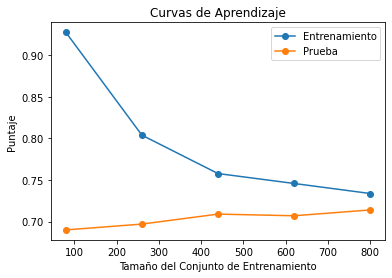

In [59]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve

# Verificar desviación y sobreajuste mediante curvas de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(LogisticRegression(max_iter=1000), X, y, cv=5)
plt.figure()
plt.title('Curvas de Aprendizaje')
plt.xlabel('Tamaño del Conjunto de Entrenamiento')
plt.ylabel('Puntaje')
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Entrenamiento')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label='Prueba')
plt.legend(loc='best')
plt.show()


**10.6 Conclusión:**

**Conjunto de Entrenamiento (Entrenamiento):** La curva de entrenamiento comienza con un puntaje de 1 en el eje y porque el modelo está sobreajustando los datos de entrenamiento iniciales muy bien. A medida que aumenta el tamaño del conjunto de entrenamiento en el eje x, la puntuación disminuye gradualmente hasta converger alrededor de 0.73 al llegar a 1000 en el eje x. Esto significa que a medida que tienes más datos de entrenamiento, el modelo no puede ajustarse tan bien a cada punto de datos individual, lo que resulta en una puntuación de entrenamiento ligeramente más baja. La convergencia de la curva de entrenamiento hacia la curva de prueba es un signo positivo, ya que sugiere que el modelo no está sobreajustando tanto y generaliza mejor a medida que tiene más datos de entrenamiento.

**Conjunto de Prueba (Prueba):** La curva de prueba comienza con un puntaje de alrededor de 0.7 y se mantiene relativamente constante a medida que aumenta el tamaño del conjunto de entrenamiento en el eje x, llegando a alrededor de 0.72 al llegar a 800 en el eje x. Esto indica que el modelo generaliza razonablemente bien desde el principio y no mejora significativamente a medida que se agregan más datos de entrenamiento. En este punto, el modelo está cerca de su capacidad máxima de generalización.

En general, estas curvas de aprendizaje sugieren que el modelo está funcionando bastante bien. Las puntuaciones tanto en el conjunto de entrenamiento como en el de prueba son razonablemente altas y están convergiendo, lo que indica que el modelo no está sobreajustando de manera significativa y está generalizando de manera efectiva a partir de los datos disponibles.

Este comportamiento es positivo porque significa que, si tienes más datos disponibles en el futuro, es posible que el modelo continúe mejorando su capacidad de generalización. También, es importante destacar que el modelo no está sobreajustando drásticamente los datos de entrenamiento actuales, lo que lo hace más confiable para hacer predicciones en datos no vistos.
